# Programming Assignment I: Exploratory Analysis over TED Talks Dataset

## Student Details

When submitting, fill your name and ID in this cell. Note that this is a markdown cell.

Student Name and ID: Nikhil Singh Kushwah , 1001510381

# Assignment Details

In this assignment, you will conduct a guided exploration over TED Talks Dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

# Dataset Details

In this assignment, you will work on TED Talks dataset. This dataset contains information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. The TED dataset contains information about all talks including number of views, number of comments, descriptions, speakers, and titles. 

### TED Talks Dataset
####  name: The official name of the TED Talk. Includes the title and the speaker.
#### title: The title of the talk
#### description: A short description of what the talk is about.
#### main_speaker: The first named speaker of the talk.
#### speaker_occupation: The occupation of the main speaker.
#### num_speaker: The number of speakers in the talk.
#### duration: The duration of the talk in seconds.
#### event: The TED/TEDx event where the talk took place.
#### published_date: The Unix timestamp for the publication of the talk on TED.com
#### comments: The number of first level comments made on the talk.
#### tags: The themes associated with the talk.
#### languages: The number of languages in which the talk is available.
#### url: The URL of the talk.
#### views: The number of views on the talk.

# Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [25]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#For some of the date operations
import datetime

# Reading Dataset
The Python code below reads the ted_talks dataset into a Pandas data frame with the name df_ted. 
For this code to work, the file 'ted_talks.csv' must be in the same folder as the notebook.

In [45]:
#read the csv file into a Pandas data frame
df_ted = pd.read_csv('ted_talks.csv', encoding='latin1')
#convert the Unix timestamps into a readable date format
df_ted['published_date'] = df_ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
#return the first 5 rows of the dataset
df_ted.head()
df_ted.dtypes
df_ted.published_date.nunique()

2336

# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [5]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.


#Task 1-a: Print the details of the df_ted data frame (information such as number of rows,columns, name of columns, etc)
print ("Task 1-a: Details of df_ted data frame are: \n", df_ted.info )


#Task 1-b: Find the number of rows and columns in the df_ted data frame.
num_rows = df_ted.shape[0]
num_cols = df_ted.shape[1]
print ("\n\nTask 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 


#Task 1-c: Print the descriptive details (min, max, quartiles etc) for 'duration' column of  the ted_talk
# duration: The duration of the talk in seconds.
print ("\n\nTask 1-c: Descriptive details of duration is \n", df_ted['duration'].describe())


#Task 1-d: Print the number of unique values for 'event' and 'languages' columns
num_uniq_event = df_ted.event.nunique()
num_uniq_languages = df_ted.languages.nunique()
print ("\n\nTask 1-d: The number of unique events :", num_uniq_event)
print ("Task 1-d: The number of unique languages :", num_uniq_languages)


Task 1-a: Details of df_ted data frame are: 
 <bound method DataFrame.info of       comments                                        description  duration  \
0         4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1          265  With the same humor and humanity he exuded in ...       977   
2          124  New York Times columnist David Pogue takes aim...      1286   
3          200  In an emotionally charged talk, MacArthur-winn...      1116   
4          593  You've never seen data presented like this. Wi...      1190   
5          672  Tony Robbins discusses the "invisible forces" ...      1305   
6          919  When two young Mormon missionaries knock on Ju...       992   
7           46  Architect Joshua Prince-Ramus takes the audien...      1198   
8          852  Philosopher Dan Dennett calls for religion -- ...      1485   
9          900  Pastor Rick Warren, author of "The Purpose-Dri...      1262   
10          79  Accepting his 2006 TED Prize, Cameron

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. Then, we will apply ranking on the results for some tasks. Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [46]:
#Task 2-a: Find out the total number of comments for all talks in TED2016 and TED2017 events.
num_comments_ted2016 = df_ted.loc[df_ted['event'] == 'TED2016', 'comments'].sum()
num_comments_ted2017 = df_ted.loc[df_ted['event'] == 'TED2017', 'comments'].sum()
print ("Task 2-a: The total number of comments on talks in TED2016 is %s and in TED2017 is %s" 
       % (num_comments_ted2016, num_comments_ted2017))



#Task 2-b: Find out the total number of talks in 2015, 2016, and 2017.
#Let us create a new column for 'year' by using 'published_date' column
df_ted['year'] = df_ted['published_date'].apply(lambda x: x.split('-')[2])
df_ted['year']
num_talks_2015 = df_ted[df_ted["event"]=='TED2015'].count()["name"]
num_talks_2016 = df_ted[df_ted["event"]=='TED2016'].count()["name"]
num_talks_2017 = df_ted[df_ted["event"]=='TED2017'].count()["name"]
print ("\n\nTask 2-b: The total number of talks in 2015 is %s, in 2016 is %s, and in 2017 is %s" 
       % (num_talks_2015, num_talks_2016, num_talks_2017))


#Task 2-c: Let us now use multiple filtering criteria
# Find out the total number of talks in 2012 and 2014 with at least 15 mins duration and 500 views.
num_talks_2012 = df_ted[(df_ted["event"]=='TED2012') & (df_ted["duration"]>900) & (df_ted["views"]>500)].count()["name"]
num_talks_2014 = df_ted[(df_ted["event"]=='TED2014') & (df_ted["duration"]>900) & (df_ted["views"]>500)].count()["name"]
print ("\n\nTask 2-c: The total number of talks that meet the given conditions in 2012 is %s and in 2014 is %s" 
       % (num_talks_2012, num_talks_2014))


#Task 2-d: Find out 5 least viewed talks in 2016 and 2017 and print their titles and number of views.
top5_least_viewed_2016 = df_ted[(df_ted["event"]=='TED2016')].sort_values("views")['views'][-5:]
top5_least_viewed_2017 = df_ted[(df_ted["event"]=='TED2017')].sort_values("views")['views'][-5:]
print ("\n\nTask 2-d: \nThe top 5 least viewed talk in 2016: \n%s \n\nThe top 5 least viewed talk in 2017: \n%s" 
                     % (top5_least_viewed_2016,top5_least_viewed_2017))


#Task 2-e: Find out 10 most commented talks in 2010 and print their titles and number of comments.
top10_most_commented_2010 = df_ted[(df_ted["event"]=='TED2010')].sort_values("comments")['comments'][:10]
print ("\n\nTask 2-e: \nThe top 10 most commented talk in 2010: \n%s" 
                     % (top10_most_commented_2010))


#Task 2-f: Find out Top-10 events with the most number of talks
top10_events_talks = None
print ("\n\nTask 2-f: \nThe top 10 events with the most number of talks: \n%s" 
                     % (top10_events_talks))


Task 2-a: The total number of comments on talks in TED2016 is 6933 and in TED2017 is 3194


Task 2-b: The total number of talks in 2015 is 75, in 2016 is 77, and in 2017 is 67


Task 2-c: The total number of talks that meet the given conditions in 2012 is 26 and in 2014 is 28


Task 2-d: 
The top 5 least viewed talk in 2016: 
2154     3325490
2233     4235594
2206     6406853
2174     6484404
2161    14745406
Name: views, dtype: int64 

The top 5 least viewed talk in 2017: 
2489    2664733
2438    2679881
2472    3183828
2450    4642478
2441    5666038
Name: views, dtype: int64


Task 2-e: 
The top 10 most commented talk in 2010: 
668     38
659     59
796     63
680     64
645     76
674     79
704     86
670     89
633     90
638    101
Name: comments, dtype: int64


Task 2-f: 
The top 10 events with the most number of talks: 
None


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.



Task 2-e: 
The top 10 most commented talk in 2010: 
2534    2
2542    3
2528    3
2501    3
2407    5
2546    6
2507    6
2392    6
2313    6
2494    7
Name: comments, dtype: int64
[37, 37, 75, 77, 67, 37, 37, 37, 37, 75, 77, 67, 37, 37, 75, 77, 67]


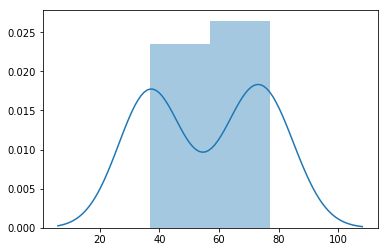

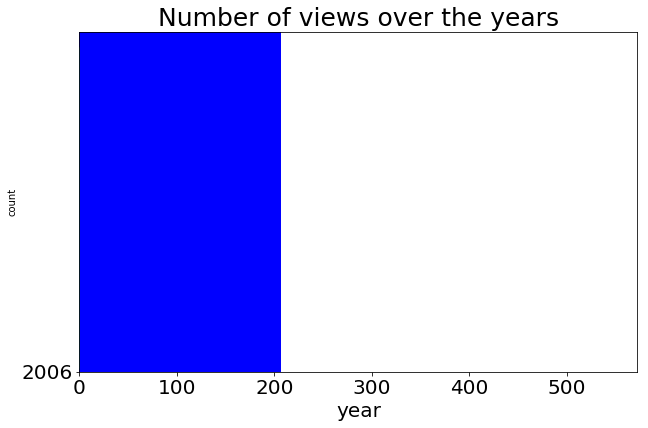

PandasError: DataFrame constructor not properly called!

In [60]:
df_speakers=df_ted[['main_speaker','comments']].sort_values("comments")['comments'][:10]
print ("\n\nTask 2-e: \nThe top 10 most commented talk in 2010: \n%s" 
                     % (df_speakers))
sns.distplot(x)




df_ted['published_year'] =df_ted['published_date'].apply(lambda x: x.split('-')).apply(pd.Series)[[2]]
view_by_year = pd.DataFrame(df_ted['views'].groupby(df_ted['published_year']).sum())
view_by_year.reset_index(level=0, inplace=True)



y1_name = view_by_year['published_year']
y1 = np.arange(len(y1_name)) 
x1 = view_by_year['views']



fig = plt.figure(figsize=(10,25))
fig.subplots_adjust(hspace=.5)
ax1=fig.add_subplot(3,1,1)
ax1.barh(y1, x1, align='center', color='b')
ax1.set_yticks(y1)
ax1.set_yticklabels(y1_name)
scale_x = 1e6
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax1.xaxis.set_major_formatter(ticks_x)
ax1.invert_yaxis()  
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.xaxis.offsetText.set_fontsize(20)
ax1.set_xlabel('Number of Views (Million)', fontsize=20)
ax1.set_title('Number of views over the years', fontsize=25)

#Task 3-a: Draw a histogram for total number of TED events hosted per year.
#########################begin code for Task 3-a

num_talks_2008 = df_ted[df_ted["event"]=='TED2005'].count()["name"]
num_talks_2009 = df_ted[df_ted["event"]=='TED2005'].count()["name"]
num_talks_2010 = df_ted[df_ted["event"]=='TED2015'].count()["name"]
num_talks_2011 = df_ted[df_ted["event"]=='TED2016'].count()["name"]
num_talks_2012 = df_ted[df_ted["event"]=='TED2017'].count()["name"]
num_talks_2013 = df_ted[df_ted["event"]=='TED2005'].count()["name"]
num_talks_2014 = df_ted[df_ted["event"]=='TED2005'].count()["name"]
num_talks_2015 = df_ted[df_ted["event"]=='TED2015'].count()["name"]
num_talks_2016 = df_ted[df_ted["event"]=='TED2016'].count()["name"]
num_talks_2017 = df_ted[df_ted["event"]=='TED2017'].count()["name"]

num_talks_2001 = df_ted[df_ted["event"]=='TED2005'].count()["name"]
num_talks_2002 = df_ted[df_ted["event"]=='TED2005'].count()["name"]
num_talks_2003 = df_ted[df_ted["event"]=='TED2015'].count()["name"]
num_talks_2004 = df_ted[df_ted["event"]=='TED2016'].count()["name"]
num_talks_2005 = df_ted[df_ted["event"]=='TED2017'].count()["name"]

num_talks_2006 = df_ted[df_ted["event"]=='TED2005'].count()["name"]
num_talks_2007 = df_ted[df_ted["event"]=='TED2005'].count()["name"]
x = [num_talks_2001,num_talks_2002,num_talks_2003,num_talks_2004,num_talks_2005,num_talks_2006,num_talks_2007,num_talks_2008,num_talks_2009,num_talks_2010,num_talks_2011,num_talks_2012,num_talks_2013,num_talks_2014,num_talks_2015,num_talks_2016,num_talks_2017]
sns.distplot( x)


print(x)
plt.hist(x)
plt.xlabel('year')
plt.ylabel('count')
plt.show()

df_ted['published_year'] =df_ted['published_date'].apply(lambda x: x.split('-')).apply(pd.Series)[[2]]
df_ted['published_year']

df_year = pd.DataFrame(df_ted['published_year'].value_counts().reset_index)
df_year.columns = ['year', 'number_of_talks']
df_year = df_year.sort_values(by='year')
x = np.arange(df_year.shape[0])
y = df_year['number_of_talks']

plt.rcParams.update({'font.size': 30})
fig=plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,2,1)
ax.bar(x, y, align='center', color='b')
ax.set_xticks(x)
ax.set_xticklabels(df_year['year'])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Published_year', fontsize=20)
ax.set_ylabel('Number of Talks', fontsize=20)
ax.set_title('Distribution of number of Ted talks over the years', fontsize=20)
#########################end code for Task 3-a


#Task 3-b: Draw a histogram for total number of talks given per year.
#########################begin code for Task 3-b
plt.hist([df_ted['year']])
plt.xlabel('year')
plt.ylabel('no. of events')
plt.show()
#########################end code for Task 3-b

#Task 3-c: Draw a histogram for total number of views per year.
#########################begin code for Task 3-c


#########################end code for Task 3-c


#Task 3-d: Draw a "vertical" bar chart that lists the top-10 main_speakers based on the number of comments.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-d


#########################end code for Task 3-d


#Task 3-e: Now repeat Task 3-d based on views (again top-10)
#########################begin code for Task 3-e

#########################end code for Task 3-e


#Task 3-f: Draw a scatter plot for average number of views per duration of talk in minutes.
# Notice that duration of talk is given in seconds. You need to convert it to minutes.
#########################begin code for Task 3-f

#########################end code for Task 3-f


#Task 3-g: Draw a line chart showing how the number of languages in average varied every year
# X-axis : year, Y-axis : the number of languages in which the talk is available
#########################begin code for Task 3-g

#########################end code for Task 3-g


#Task 3-h: Draw a 'horizontal' bar chart for the top-10 most common occupation for main_speaker. 
#Notice that you need to use "speaker_occupation" field of your daset and the value of this field is given an array.
#########################begin code for Task 3-h

#########################end code for Task 3-h


#Task 3-i: Draw a 'horizontal' bar chart for the top-10 most common themes. 
#Notice that you need to use the 'tag' column of your dataset and value of this column is given an array.
#########################begin code for Task 3-i

#########################end code for Task 3-i





# Task 4: 
Find out an interesting information from your ted_talks dataset. Create a visualization for it. 
This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visulization). 

In [8]:
#########################begin code for Task 4

#########################end code for Task 4

# Grading

Task 1: 10 points
Task 2: 30 points
Task 3: 40 points
Task 4: 20 points
